<a href="https://colab.research.google.com/github/pascal-maker/Python/blob/master/Labo_06_Stationaire_tijdsreeksen_opdracht.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:darkorange"> Stationaire tijdsreeksen opdracht opgave

In [166]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf #python -m pip install statsmodels
%matplotlib inline
plt.style.use('seaborn-v0_8-whitegrid')  #kies style --> beschikbare styles opvragen via: print(plt.style.available)
import numpy as np

## <span style="color:deeppink"> Vraag 1 - ziektegevallen </span>

Lees het bestand `zieken.csv` in, gebruik de eerste kolom als index

In [167]:
dataset = pd.read_csv('zieken.csv',index_col="Dag")
dataset.head()

,Aantal zieken
Dag,
1,9
2,12
3,12
4,19
5,16


Stel de data voor met een passende grafiek die duidelijk het verloop van het aantal zieken per dag weergeeft.  

Text(0, 0.5, 'Aantal zieken')

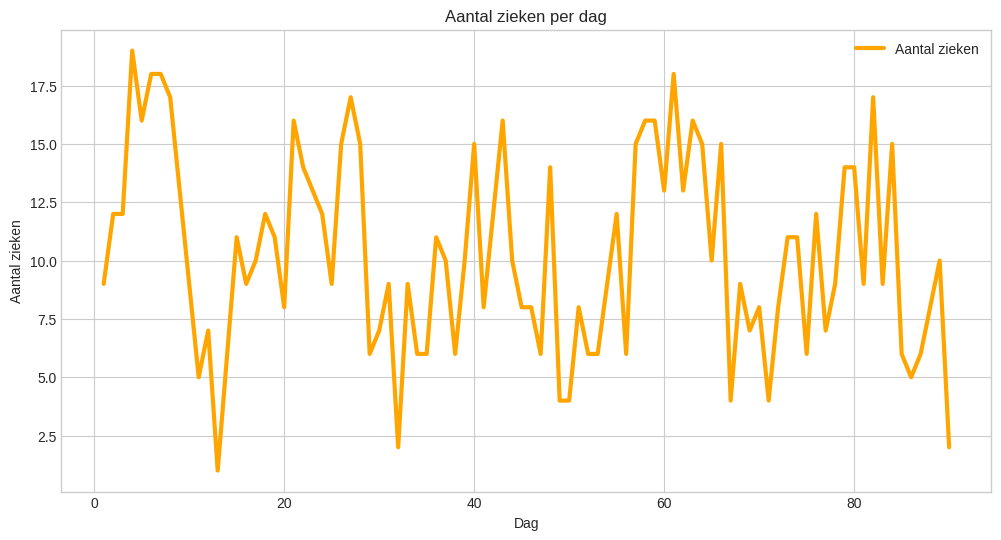

In [168]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('Aantal zieken per dag')
plt.xlabel('Dag')
plt.ylabel('Aantal zieken')

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Intercept = 11.571285892634208
Richtingscoëfficiënt =  -0.02818454953286414


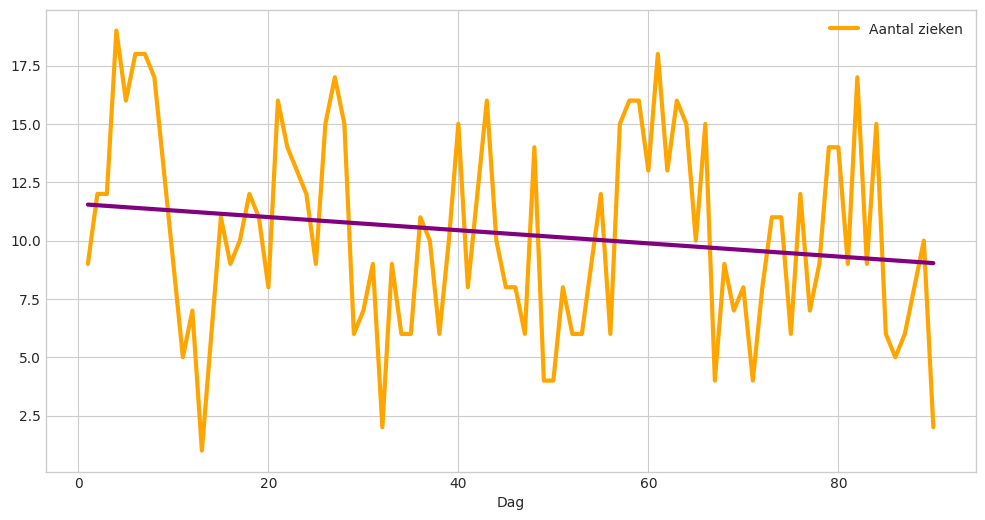

In [169]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['Aantal zieken'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
sns.set_style("darkgrid")

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoe lang duurt zo een patroon?

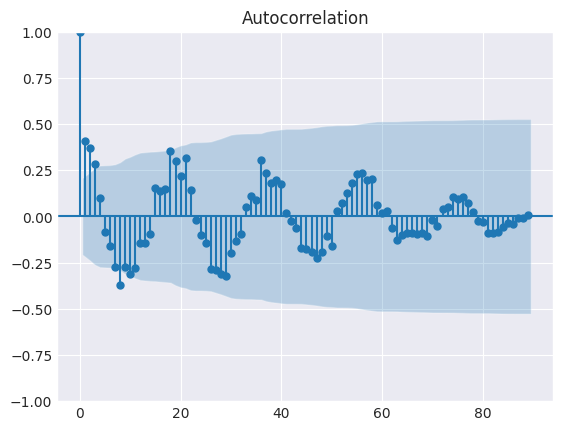

In [170]:
fig = plot_acf(dataset['Aantal zieken'],lags=len(dataset)-1)

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error) en de MAPE (Mean Absolute Percentage Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 3 punts moving average
- Voorspelde waarde is het 5 punts moving average
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.


In [171]:
dataset['MA_3'] = dataset['Aantal zieken'].rolling(3).mean().shift(1)
print(dataset.shape)
dataset.head()

(90, 2)


,Aantal zieken,MA_3
Dag,,
1,9,NaN
2,12,NaN
3,12,NaN
4,19,11.000000
5,16,14.333333


In [172]:
dataset['MA_5'] = dataset['Aantal zieken'].rolling(5).mean().shift(1)
print(dataset.shape)
dataset.head()

(90, 3)


,Aantal zieken,MA_3,MA_5
Dag,,,
1,9,NaN,NaN
2,12,NaN,NaN
3,12,NaN,NaN
4,19,11.000000,NaN
5,16,14.333333,NaN


In [173]:
dataset['MA_10'] = dataset['Aantal zieken'].rolling(10).mean().shift(1)
print(dataset.shape)
dataset.head()

(90, 4)


,Aantal zieken,MA_3,MA_5,MA_10
Dag,,,,
1,9,NaN,NaN,NaN
2,12,NaN,NaN,NaN
3,12,NaN,NaN,NaN
4,19,11.000000,NaN,NaN
5,16,14.333333,NaN,NaN


Text(0, 0.5, 'Aantal zieken')

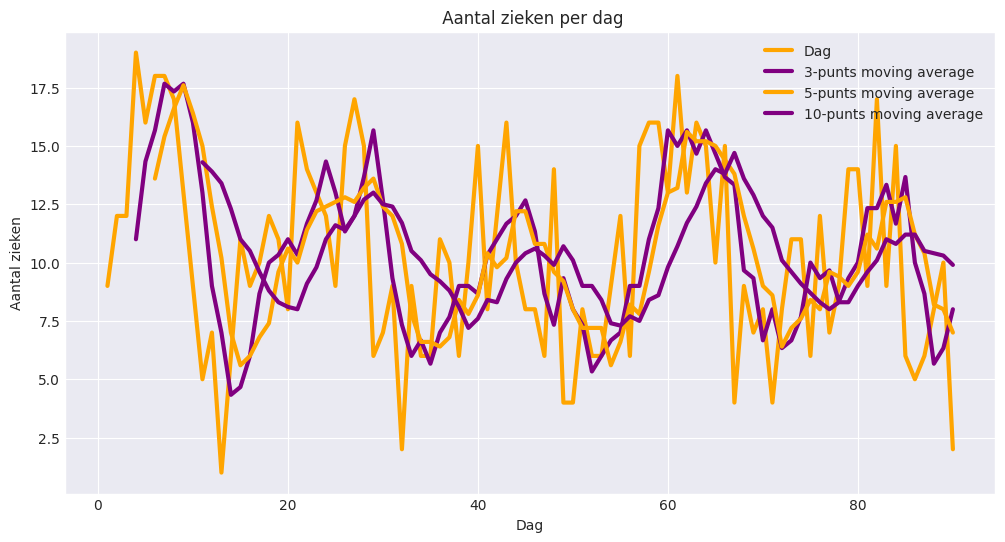

In [174]:
colors = ['orange','purple']
dataset.plot(color=colors,linewidth=3,figsize=(12,6))
plt.legend(labels = ['Dag','3-punts moving average','5-punts moving average','10-punts moving average'] )
plt.title(" Aantal zieken per dag")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

In [175]:
dataset['absolute error MA3'] = abs(dataset['Aantal zieken'] - dataset.MA_3)
print(dataset.head())
mae = dataset['absolute error MA3'].mean()
mae

     Aantal zieken       MA_3  MA_5  MA_10  absolute error MA3
Dag                                                           
1                9        NaN   NaN    NaN                 NaN
2               12        NaN   NaN    NaN                 NaN
3               12        NaN   NaN    NaN                 NaN
4               19  11.000000   NaN    NaN            8.000000
5               16  14.333333   NaN    NaN            1.666667


np.float64(3.360153256704982)

In [176]:
dataset['absolute error MA5'] = abs(dataset['Aantal zieken'] - dataset.MA_5)
print(dataset.head())
mae = dataset['absolute error MA5'].mean()
mae

     Aantal zieken       MA_3  MA_5  MA_10  absolute error MA3  \
Dag                                                              
1                9        NaN   NaN    NaN                 NaN   
2               12        NaN   NaN    NaN                 NaN   
3               12        NaN   NaN    NaN                 NaN   
4               19  11.000000   NaN    NaN            8.000000   
5               16  14.333333   NaN    NaN            1.666667   

     absolute error MA5  
Dag                      
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
5                   NaN  


np.float64(3.6)

In [177]:
dataset['absolute error MA10'] = abs(dataset['Aantal zieken'] - dataset.MA_10)
print(dataset.head())
mae = dataset['absolute error MA10'].mean()
mae

     Aantal zieken       MA_3  MA_5  MA_10  absolute error MA3  \
Dag                                                              
1                9        NaN   NaN    NaN                 NaN   
2               12        NaN   NaN    NaN                 NaN   
3               12        NaN   NaN    NaN                 NaN   
4               19  11.000000   NaN    NaN            8.000000   
5               16  14.333333   NaN    NaN            1.666667   

     absolute error MA5  absolute error MA10  
Dag                                           
1                   NaN                  NaN  
2                   NaN                  NaN  
3                   NaN                  NaN  
4                   NaN                  NaN  
5                   NaN                  NaN  


np.float64(3.9574999999999996)

In [178]:
dataset['MAPE MA3'] = abs(dataset['absolute error MA3']/dataset['Aantal zieken']*100)
mape = dataset["MAPE MA3"].mean()
print("De mean absolute percentage error is: ", mape, "%")

De mean absolute percentage error is:  50.42663114951468 %


In [179]:
dataset['MAPE MA5'] = abs(dataset['absolute error MA5']/dataset['Aantal zieken']*100)
mape = dataset["MAPE MA5"].mean()
print("De mean absolute percentage error is: ", mape, "%")

De mean absolute percentage error is:  58.484778447235186 %


In [180]:
dataset['MAPE MA10'] = abs(dataset['absolute error MA10']/dataset['Aantal zieken']*100)
mape = dataset["MAPE MA10"].mean()
print("De mean absolute percentage error is: ", mape, "%")

De mean absolute percentage error is:  70.64339011682762 %


Visualiseer de geteste methodes samen met het aantal zieken in 1 grafiek.

Text(0, 0.5, 'Aantal zieken')

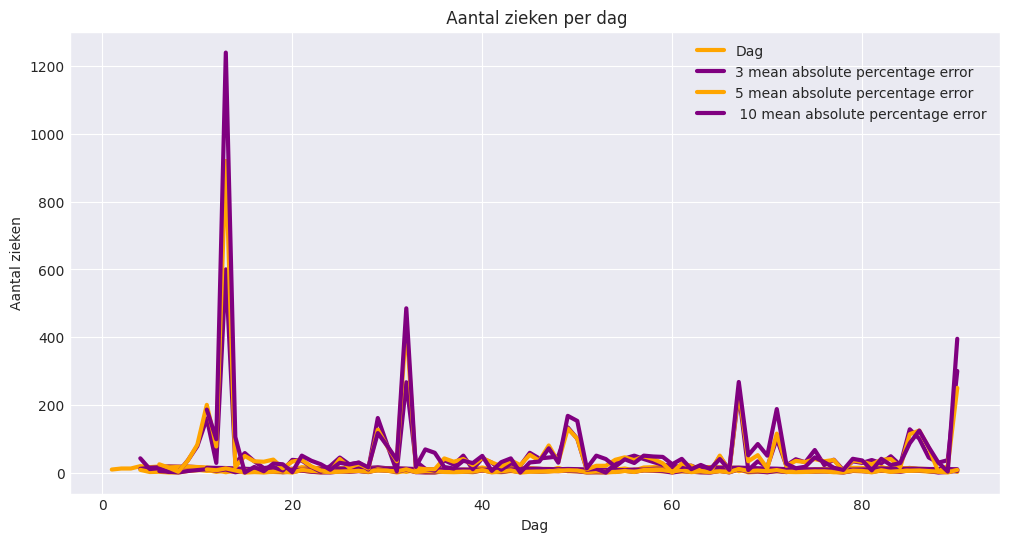

In [181]:
colors = ['orange','purple',]
dataset.plot(color=colors,linewidth=3,figsize=(12,6))
plt.legend(labels = ['Dag','3 mean absolute percentage error', '5 mean absolute percentage error',' 10 mean absolute percentage error'] )
plt.title(" Aantal zieken per dag")
plt.xlabel(dataset.index.name)
plt.ylabel(dataset.columns[0])

In [182]:
dataset['exponential_0.1'] = dataset['Aantal zieken'].ewm(alpha=0.1,adjust=False).mean().shift(1)

In [183]:
dataset['absolute error exponentiele demping'] = abs(dataset['Aantal zieken']- dataset['exponential_0.1'])

In [184]:
mae_exponential = dataset['absolute error exponentiele demping'].mean()
print(mae_exponential)

3.6580933113481326


In [185]:
step =1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['Aantal zieken'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['Aantal zieken'] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = "Alpha"
minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is:",minimum_mae,"index:")
print("index",df[df['mae'] == minimum_mae].index[0])

The alpha with the lowest MAE is: 3.308328389653638 index:
index 0.494


In [186]:
# after you built df with MAE per alpha...
best_index = df['mae'].idxmin()    # ≈0.235


Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

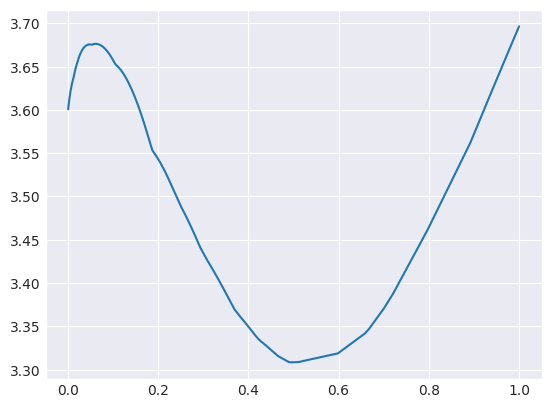

In [187]:
plt.plot(df['mae'])

In [188]:
dataset['exponential_0.001'] = dataset['Aantal zieken'].ewm(alpha=0.001,adjust=False).mean().shift(1)

In [189]:
dataset['absolute error exp alpha 0.001'] = abs(dataset['Aantal zieken'] - dataset['exponential_0.001'])
dataset.head()

,Aantal zieken,MA_3,MA_5,MA_10,absolute error MA3,absolute error MA5,absolute error MA10,MAPE MA3,MAPE MA5,MAPE MA10,exponential_0.1,absolute error exponentiele demping,exponential_0.001,absolute error exp alpha 0.001
Dag,,,,,,,,,,,,,,
1,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000,3.000,9.000000,3.000000
3,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.300,2.700,9.003000,2.997000
4,19,11.000000,NaN,NaN,8.000000,NaN,NaN,42.105263,NaN,NaN,9.570,9.430,9.005997,9.994003
5,16,14.333333,NaN,NaN,1.666667,NaN,NaN,10.416667,NaN,NaN,10.513,5.487,9.015991,6.984009


In [190]:
mae_exponential = dataset['absolute error exp alpha 0.001'].mean()
print(mae_exponential)

3.6007463917628857


Text(0.5, 0, 'Dag')

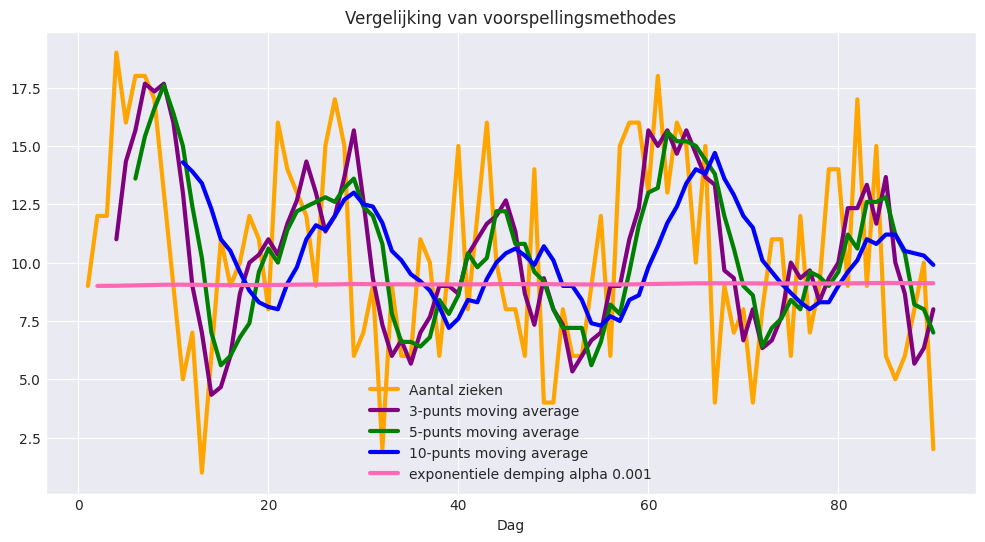

In [191]:
dataset['Aantal zieken'].plot(color='orange',linewidth=3,figsize=(12,6))
dataset['MA_3'].plot(color = 'purple', linewidth=3)
dataset['MA_5'].plot(color = 'green', linewidth=3)
dataset['MA_10'].plot(color = 'blue', linewidth=3)
dataset['exponential_0.001'].plot(color = 'hotpink', linewidth=3)
plt.legend(labels = ['Aantal zieken', '3-punts moving average','5-punts moving average','10-punts moving average',  'exponentiele demping alpha 0.001'])
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel(dataset.index.name)


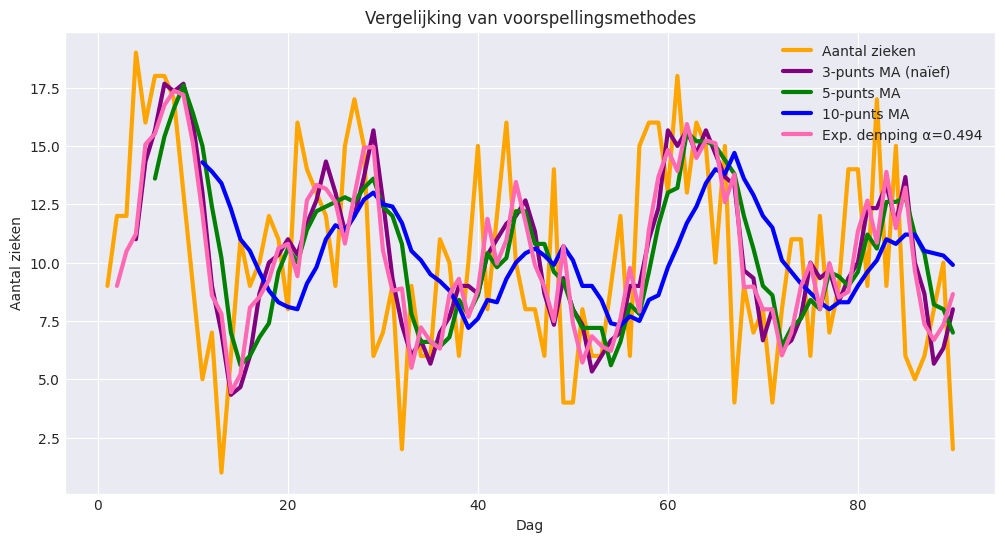

In [192]:
# 1) Maak de beste expo‐demping
dataset['exp_best'] = (
    dataset['Aantal zieken']
    .ewm(alpha=best_index, adjust=False)
    .mean()
    .shift(1)
)

# 2) Plot alle series
plt.figure(figsize=(12,6))

dataset['Aantal zieken'].plot(color='orange', linewidth=3)
dataset['MA_3'].plot(color='purple', linewidth=3)
dataset['MA_5'].plot(color='green', linewidth=3)
dataset['MA_10'].plot(color='blue', linewidth=3)
dataset['exp_best'].plot(color='hotpink', linewidth=3)

plt.legend([
    'Aantal zieken',
    '3-punts MA (naïef)',
    '5-punts MA',
    '10-punts MA',
    f'Exp. demping α={best_index:.3f}'
])
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel(dataset.index.name)
plt.ylabel('Aantal zieken')
plt.show()


ik vind de beste  methode exponentiele demping alpha de beste methode om het aantal  zieken te voorspellen

## <span style="color:deeppink"> Vraag 2 - Zonnepanelen </span>

Lees het bestand `zonnepanelen.csv` in, gebruik de eerste kolom als index

In [193]:
dataset = pd.read_csv('/content/zonnepanelen.csv',index_col='Tijdstip')
dataset.head()

,Elec_kWh
Tijdstip,
0,15.1
1,7.4
2,5.8
3,4.9
4,11.7


Stel de data voor met een passende grafiek die duidelijk het verloop van de hoeveelheid elektriciteit opgewekt en verbruikt weergeeft.

Text(0, 0.5, 'Elec_kWh')

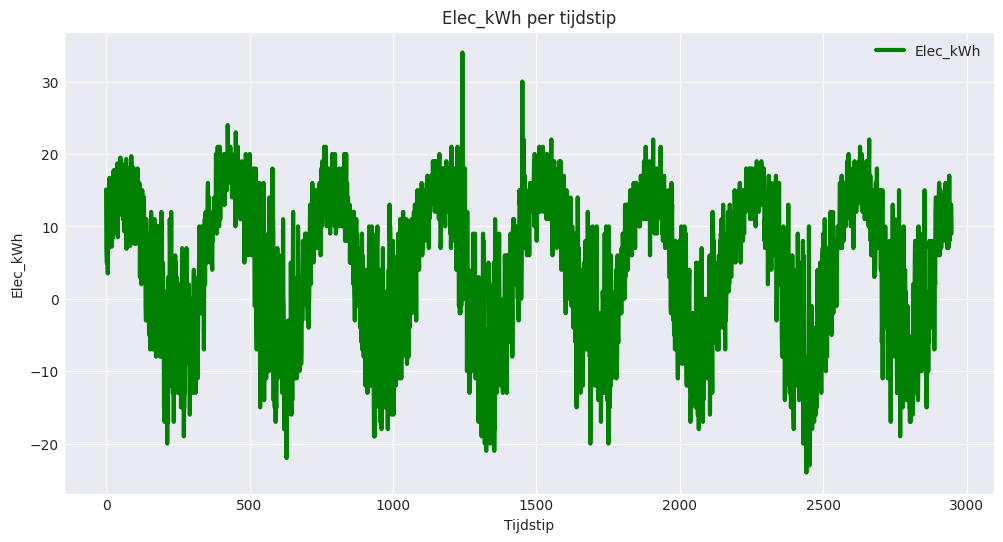

In [194]:
dataset.plot(color='green',linewidth=3,figsize=(12,6))
plt.title('Elec_kWh per tijdstip')
plt.xlabel('Tijdstip')
plt.ylabel('Elec_kWh')

Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks

Intercept = 5.74161753886629
Richtingscoeffiecient =  -0.000829049182453518


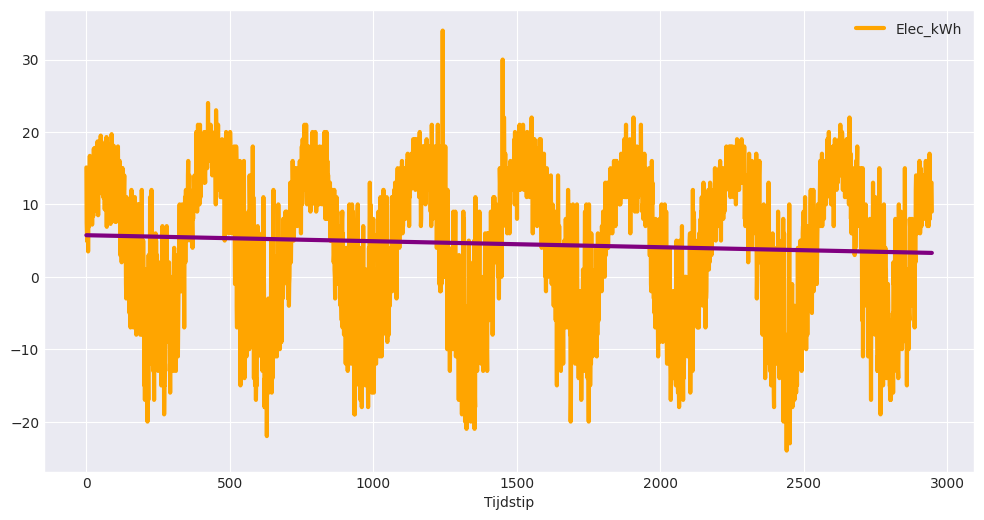

In [195]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['Elec_kWh'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)
print('Intercept =',regressionline.intercept_)
print('Richtingscoeffiecient = ',regressionline.coef_[0])
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
sns.set_style("darkgrid")

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

er zijn patronen die zich constant herhalen zo een patroon duurt ongeveer  500

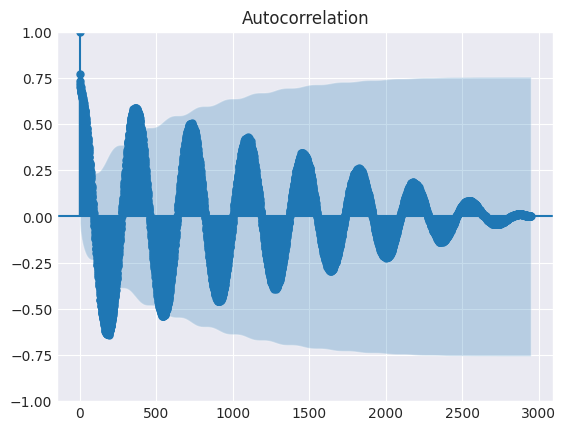

In [196]:
fig = plot_acf(dataset['Elec_kWh'],lags=len(dataset)-1)

Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde is het 20 punts moving average
- Voorspelde waarde is het 50 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.

In [197]:
dataset['MA_1'] = dataset['Elec_kWh'].rolling(1).mean().shift(1)
print(dataset.shape)
dataset.head()

(2948, 2)


,Elec_kWh,MA_1
Tijdstip,,
0,15.1,NaN
1,7.4,15.1
2,5.8,7.4
3,4.9,5.8
4,11.7,4.9


In [198]:
dataset['MA_10'] = dataset['Elec_kWh'].rolling(10).mean().shift(1)
print(dataset.shape)
dataset.head()

(2948, 3)


,Elec_kWh,MA_1,MA_10
Tijdstip,,,
0,15.1,NaN,NaN
1,7.4,15.1,NaN
2,5.8,7.4,NaN
3,4.9,5.8,NaN
4,11.7,4.9,NaN


In [199]:
dataset['MA_20'] = dataset['Elec_kWh'].rolling(20).mean().shift(1)
print(dataset.shape)
dataset.head()

(2948, 4)


,Elec_kWh,MA_1,MA_10,MA_20
Tijdstip,,,,
0,15.1,NaN,NaN,NaN
1,7.4,15.1,NaN,NaN
2,5.8,7.4,NaN,NaN
3,4.9,5.8,NaN,NaN
4,11.7,4.9,NaN,NaN


In [200]:
dataset['MA_50'] = dataset['Elec_kWh'].rolling(50).mean().shift(1)
print(dataset.shape)
dataset.head()

(2948, 5)


,Elec_kWh,MA_1,MA_10,MA_20,MA_50
Tijdstip,,,,,
0,15.1,NaN,NaN,NaN,NaN
1,7.4,15.1,NaN,NaN,NaN
2,5.8,7.4,NaN,NaN,NaN
3,4.9,5.8,NaN,NaN,NaN
4,11.7,4.9,NaN,NaN,NaN


In [201]:
dataset['absolute error MA1'] = abs(dataset['Elec_kWh'] -dataset.MA_1)
print(dataset.head())
mae = dataset['absolute error MA1'].mean()
mae

          Elec_kWh  MA_1  MA_10  MA_20  MA_50  absolute error MA1
Tijdstip                                                         
0             15.1   NaN    NaN    NaN    NaN                 NaN
1              7.4  15.1    NaN    NaN    NaN                 7.7
2              5.8   7.4    NaN    NaN    NaN                 1.6
3              4.9   5.8    NaN    NaN    NaN                 0.9
4             11.7   4.9    NaN    NaN    NaN                 6.8


np.float64(4.9678656260604)

In [202]:
dataset['absolute error MA10'] = abs(dataset['Elec_kWh'] -dataset.MA_10)
print(dataset.head())
mae = dataset['absolute error MA10'].mean()
mae

          Elec_kWh  MA_1  MA_10  MA_20  MA_50  absolute error MA1  \
Tijdstip                                                            
0             15.1   NaN    NaN    NaN    NaN                 NaN   
1              7.4  15.1    NaN    NaN    NaN                 7.7   
2              5.8   7.4    NaN    NaN    NaN                 1.6   
3              4.9   5.8    NaN    NaN    NaN                 0.9   
4             11.7   4.9    NaN    NaN    NaN                 6.8   

          absolute error MA10  
Tijdstip                       
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  


np.float64(4.379795779441797)

In [203]:
dataset['absolute error MA20'] = abs(dataset['Elec_kWh'] -dataset.MA_20)
print(dataset.head())
mae = dataset['absolute error MA20'].mean()
mae

          Elec_kWh  MA_1  MA_10  MA_20  MA_50  absolute error MA1  \
Tijdstip                                                            
0             15.1   NaN    NaN    NaN    NaN                 NaN   
1              7.4  15.1    NaN    NaN    NaN                 7.7   
2              5.8   7.4    NaN    NaN    NaN                 1.6   
3              4.9   5.8    NaN    NaN    NaN                 0.9   
4             11.7   4.9    NaN    NaN    NaN                 6.8   

          absolute error MA10  absolute error MA20  
Tijdstip                                            
0                         NaN                  NaN  
1                         NaN                  NaN  
2                         NaN                  NaN  
3                         NaN                  NaN  
4                         NaN                  NaN  


np.float64(4.51136099726776)

In [204]:
dataset['absolute error MA50'] = abs(dataset['Elec_kWh'] -dataset.MA_50)
print(dataset.head())
mae = dataset['absolute error MA50'].mean()
mae

          Elec_kWh  MA_1  MA_10  MA_20  MA_50  absolute error MA1  \
Tijdstip                                                            
0             15.1   NaN    NaN    NaN    NaN                 NaN   
1              7.4  15.1    NaN    NaN    NaN                 7.7   
2              5.8   7.4    NaN    NaN    NaN                 1.6   
3              4.9   5.8    NaN    NaN    NaN                 0.9   
4             11.7   4.9    NaN    NaN    NaN                 6.8   

          absolute error MA10  absolute error MA20  absolute error MA50  
Tijdstip                                                                 
0                         NaN                  NaN                  NaN  
1                         NaN                  NaN                  NaN  
2                         NaN                  NaN                  NaN  
3                         NaN                  NaN                  NaN  
4                         NaN                  NaN                  NaN 

np.float64(5.241570738440304)

In [205]:
dataset['exponential_0.1'] = dataset['Elec_kWh'].ewm(alpha=0.1,adjust=False).mean().shift(1)

In [206]:
dataset['absolute error exponentiele demping'] = abs(dataset['Elec_kWh'] - dataset['exponential_0.1'])

In [207]:
mae_exponential = dataset['absolute error exponentiele demping'].mean()
print(mae_exponential)

4.369366039763384


In [209]:
step =1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['Elec_kWh'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['Elec_kWh'] - exponential).mean())
df['mae'] = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = "Alpha"
minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is:",minimum_mae,"index:")
print("index",df[df['mae'] == minimum_mae].index[0])

The alpha with the lowest MAE is: 4.231246003570098 index:
index 0.23500000000000001


In [211]:
# after you built df with MAE per alpha...
best_one = df['mae'].idxmin()    # ≈0.235


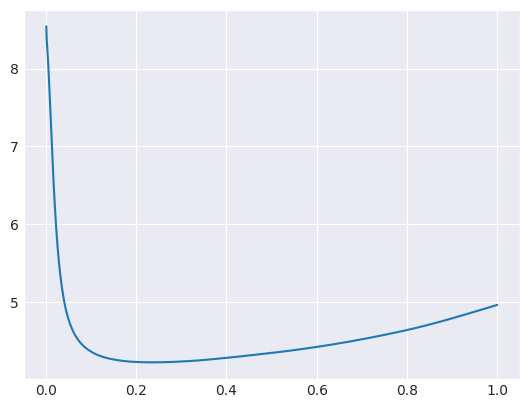

In [212]:
plt.plot(df['mae'])

In [213]:
dataset['exponential_0.001'] = dataset['Elec_kWh'].ewm(alpha=0.001,adjust=False).mean().shift(1)

In [214]:
dataset['absolute error exp alpha 0.001'] = abs(dataset['Elec_kWh'] - dataset['exponential_0.001'])
dataset.head()

,Elec_kWh,MA_1,MA_10,MA_20,MA_50,absolute error MA1,absolute error MA10,absolute error MA20,absolute error MA50,exponential_0.1,absolute error exponentiele demping,exponential_0.001,absolute error exp alpha 0.001
Tijdstip,,,,,,,,,,,,,
0,15.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7.4,15.1,NaN,NaN,NaN,7.7,NaN,NaN,NaN,15.1000,7.7000,15.100000,7.700000
2,5.8,7.4,NaN,NaN,NaN,1.6,NaN,NaN,NaN,14.3300,8.5300,15.092300,9.292300
3,4.9,5.8,NaN,NaN,NaN,0.9,NaN,NaN,NaN,13.4770,8.5770,15.083008,10.183008
4,11.7,4.9,NaN,NaN,NaN,6.8,NaN,NaN,NaN,12.6193,0.9193,15.072825,3.372825


Visualiseer de geteste methodes samen met het verbruik in 1 grafiek

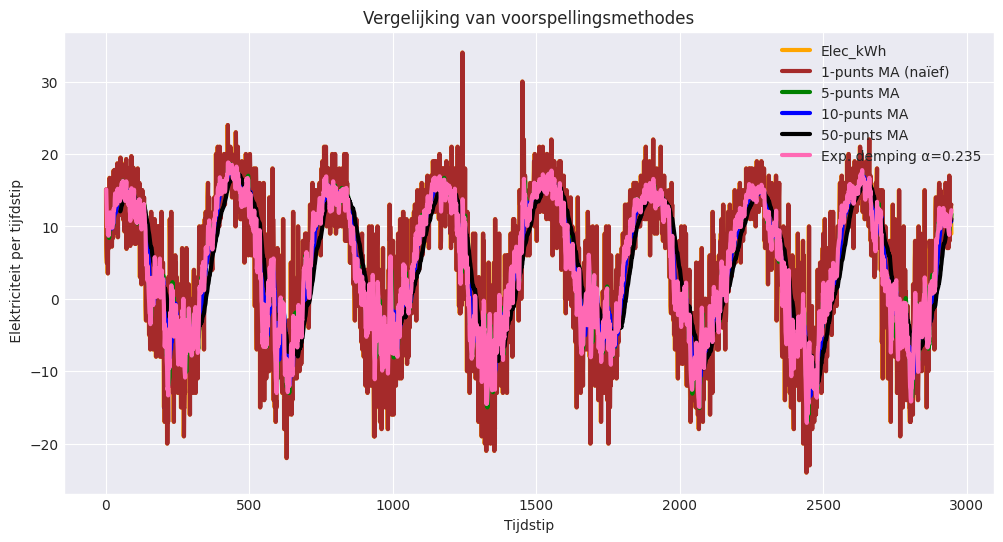

In [218]:
# 1) Maak de beste expo‐demping
dataset['exp_best'] = (
    dataset['Elec_kWh']
    .ewm(alpha=best_one, adjust=False)
    .mean()
    .shift(1)
)

# 2) Plot alle series
plt.figure(figsize=(12,6))

dataset['Elec_kWh'].plot(color='orange', linewidth=3)
dataset['MA_1'].plot(color='brown', linewidth=3)
dataset['MA_10'].plot(color='green', linewidth=3)
dataset['MA_20'].plot(color='blue', linewidth=3)
dataset['MA_50'].plot(color='black', linewidth=3)
dataset['exp_best'].plot(color='hotpink', linewidth=3)

plt.legend([
    'Elec_kWh',
    '1-punts MA (naïef)',
    '5-punts MA',
    '10-punts MA',
    '50-punts MA',
    f'Exp. demping α={best_one:.3f}'
])
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel(dataset.index.name)
plt.ylabel(' Elektriciteit per tijfdstip')
plt.show()


Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.

de exponetiele demping om dat het makkelijker is om te voorspellen wegens het stationaire.

## <span style="color:deeppink"> Vraag 3 - Temperatuur in Barcelona </span>

Lees het bestand `yearly_average_temperature_barcelona.csv` in, gebruik de eerste kolom als index

In [ ]:
dataset = pd.read_csv('/content/yearly_average_temperature_barcelona.csv',index_col='year')
dataset.head()

,average_temperature
year,
1800,14.183333
1801,14.000000
1802,14.066667
1803,13.850000
1804,14.591667


Ga na via de trendlijn of er al dan niet sprake is van een stationaire tijdreeks.

Text(0, 0.5, 'average temperature')

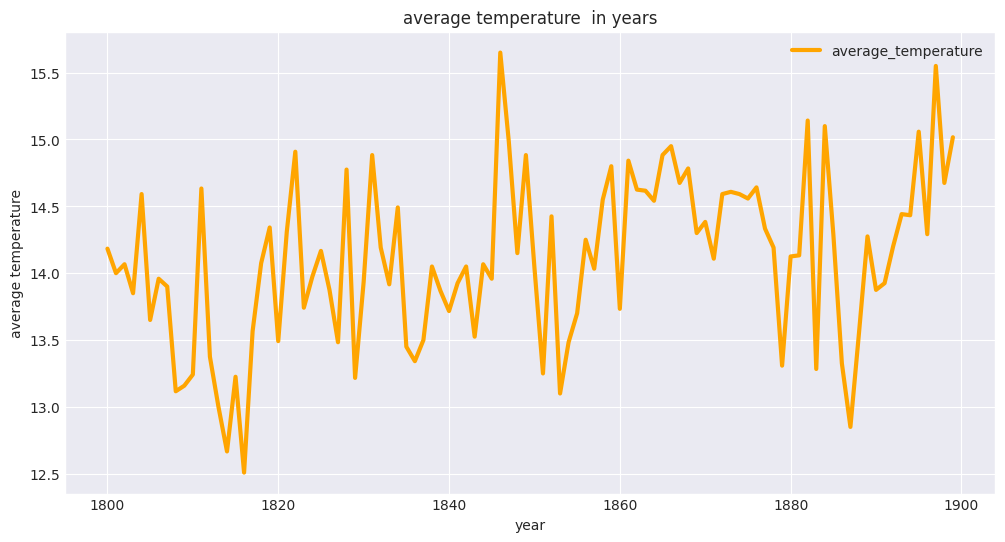

In [ ]:
dataset.plot(color='orange',linewidth=3,figsize=(12,6))
plt.title('average temperature  in years')
plt.xlabel('year')
plt.ylabel('average temperature')

Intercept = -0.8919090909091061
Richtingscoëfficiënt =  0.008106060606060615


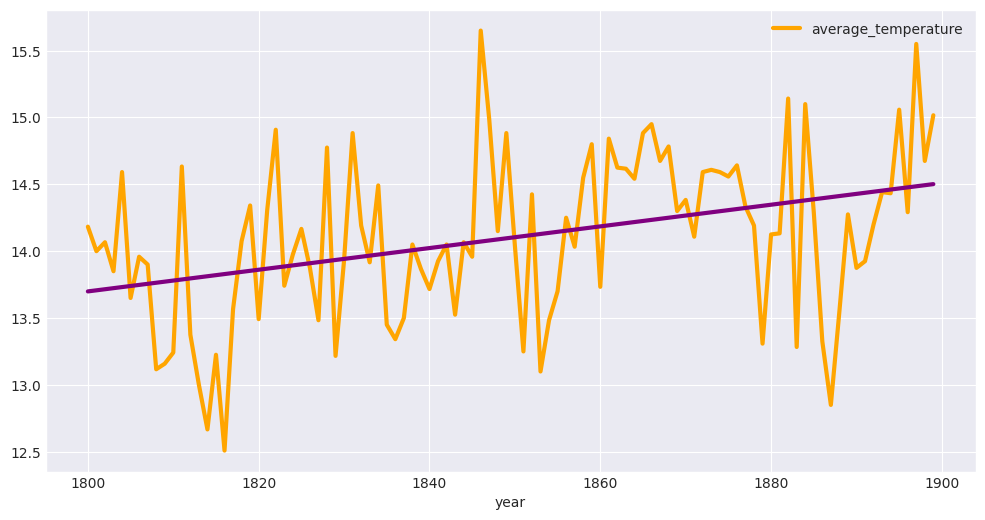

In [ ]:
from sklearn import datasets,linear_model
x = dataset.index.values
y = dataset['average_temperature'].values
regressionline = linear_model.LinearRegression()
regressionline.fit(x.reshape(-1,1),y)

print('Intercept =', regressionline.intercept_ )
print('Richtingscoëfficiënt = ', regressionline.coef_[0])
dataset.plot(color='orange', linewidth=3, figsize=(12,6))
sns.lineplot(x=x,y=regressionline.predict(x.reshape(-1,1)),color='purple',linewidth=3)
sns.set_style("darkgrid")

Gebruik autocorrelatie om patronen te detecteren. Is er periodiciteit? Met andere woorden zijn er patronen die zich constant herhalen? Zo ja, hoelang duurt zo een patroon(ongeveer)?

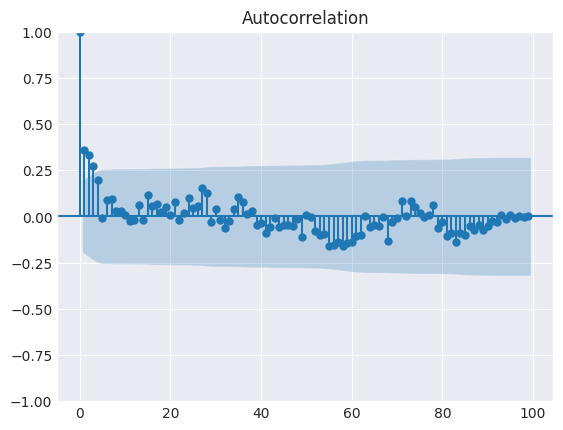

In [ ]:
fig = plot_acf(dataset['average_temperature'],lags=len(dataset)-1)

Zoek een optimale techniek voor het voorspellen van de volgende sample. Je kan kiezen uit alle technieken die tot nu toe aan bod zijn gekomen:
- Volgende sample is huidige sample
- Moving average met verschillende groottes
- Exponentiële demping. Zorg dat je de factor alfa kan aanpassen.


Vergelijk onderstaande voorspellingsmethodes in termen van de MAE (Mean Absolute Error).
- Voorspelde waarde is de huidige waarde
- Voorspelde waarde is het 10 punts moving average
- Voorspelde waarde is het 20 punts moving average
- Voorspelde waarde is het 50 punts moving average
- Voorspelde waarde via exponentiële demping, zoek de optimale alpha.

In [ ]:
dataset['MA_1'] = dataset['average_temperature'].rolling(1).mean().shift(1)
print(dataset.shape)
dataset.head()

(100, 2)


,average_temperature,MA_1
year,,
1800,14.183333,NaN
1801,14.000000,14.183333
1802,14.066667,14.000000
1803,13.850000,14.066667
1804,14.591667,13.850000


In [ ]:
dataset['MA_10'] = dataset['average_temperature'].rolling(10).mean().shift(1)
print(dataset.shape)
dataset.head()

(100, 3)


,average_temperature,MA_1,MA_10
year,,,
1800,14.183333,NaN,NaN
1801,14.000000,14.183333,NaN
1802,14.066667,14.000000,NaN
1803,13.850000,14.066667,NaN
1804,14.591667,13.850000,NaN


In [ ]:
dataset['MA_20'] = dataset['average_temperature'].rolling(20).mean().shift(1)
print(dataset.shape)
dataset.head()

(100, 4)


,average_temperature,MA_1,MA_10,MA_20
year,,,,
1800,14.183333,NaN,NaN,NaN
1801,14.000000,14.183333,NaN,NaN
1802,14.066667,14.000000,NaN,NaN
1803,13.850000,14.066667,NaN,NaN
1804,14.591667,13.850000,NaN,NaN


In [ ]:
dataset['MA_50'] = dataset['average_temperature'].rolling(50).mean().shift(1)
print(dataset.shape)
dataset.head()

(100, 5)


,average_temperature,MA_1,MA_10,MA_20,MA_50
year,,,,,
1800,14.183333,NaN,NaN,NaN,NaN
1801,14.000000,14.183333,NaN,NaN,NaN
1802,14.066667,14.000000,NaN,NaN,NaN
1803,13.850000,14.066667,NaN,NaN,NaN
1804,14.591667,13.850000,NaN,NaN,NaN


In [ ]:
dataset['absolute error MA1'] = abs(dataset['average_temperature'] -dataset.MA_1)
print(dataset.head())
mae = dataset['absolute error MA1'].mean()
mae

      average_temperature       MA_1  MA_10  MA_20  MA_50  absolute error MA1
year                                                                         
1800            14.183333        NaN    NaN    NaN    NaN                 NaN
1801            14.000000  14.183333    NaN    NaN    NaN            0.183333
1802            14.066667  14.000000    NaN    NaN    NaN            0.066667
1803            13.850000  14.066667    NaN    NaN    NaN            0.216667
1804            14.591667  13.850000    NaN    NaN    NaN            0.741667


np.float64(0.5503367003367007)

In [ ]:
dataset['absolute error MA10'] = abs(dataset['average_temperature'] -dataset.MA_10)
print(dataset.head())
mae = dataset['absolute error MA10'].mean()
mae

      average_temperature       MA_1  MA_10  MA_20  MA_50  absolute error MA1  \
year                                                                            
1800            14.183333        NaN    NaN    NaN    NaN                 NaN   
1801            14.000000  14.183333    NaN    NaN    NaN            0.183333   
1802            14.066667  14.000000    NaN    NaN    NaN            0.066667   
1803            13.850000  14.066667    NaN    NaN    NaN            0.216667   
1804            14.591667  13.850000    NaN    NaN    NaN            0.741667   

      absolute error MA10  
year                       
1800                  NaN  
1801                  NaN  
1802                  NaN  
1803                  NaN  
1804                  NaN  


np.float64(0.48812037037037015)

In [ ]:
dataset['absolute error MA20'] = abs(dataset['average_temperature'] -dataset.MA_20)
print(dataset.head())
mae = dataset['absolute error MA20'].mean()
mae

      average_temperature       MA_1  MA_10  MA_20  MA_50  absolute error MA1  \
year                                                                            
1800            14.183333        NaN    NaN    NaN    NaN                 NaN   
1801            14.000000  14.183333    NaN    NaN    NaN            0.183333   
1802            14.066667  14.000000    NaN    NaN    NaN            0.066667   
1803            13.850000  14.066667    NaN    NaN    NaN            0.216667   
1804            14.591667  13.850000    NaN    NaN    NaN            0.741667   

      absolute error MA10  absolute error MA20  
year                                            
1800                  NaN                  NaN  
1801                  NaN                  NaN  
1802                  NaN                  NaN  
1803                  NaN                  NaN  
1804                  NaN                  NaN  


np.float64(0.4724791666666663)

In [ ]:
dataset['absolute error MA50'] = abs(dataset['average_temperature'] -dataset.MA_50)
print(dataset.head())
mae = dataset['absolute error MA50'].mean()
mae

      average_temperature       MA_1  MA_10  MA_20  MA_50  absolute error MA1  \
year                                                                            
1800            14.183333        NaN    NaN    NaN    NaN                 NaN   
1801            14.000000  14.183333    NaN    NaN    NaN            0.183333   
1802            14.066667  14.000000    NaN    NaN    NaN            0.066667   
1803            13.850000  14.066667    NaN    NaN    NaN            0.216667   
1804            14.591667  13.850000    NaN    NaN    NaN            0.741667   

      absolute error MA10  absolute error MA20  absolute error MA50  
year                                                                 
1800                  NaN                  NaN                  NaN  
1801                  NaN                  NaN                  NaN  
1802                  NaN                  NaN                  NaN  
1803                  NaN                  NaN                  NaN  
1804        

np.float64(0.4919266666666667)

In [ ]:
dataset['exponential_0.1'] = dataset['average_temperature'].ewm(alpha=0.265,adjust=False).mean().shift(1)

In [ ]:
dataset['absolute error exponentiele demping'] = abs(dataset['average_temperature'] - dataset['exponential_0.1'])

In [ ]:
mae_exponential = dataset['absolute error exponentiele demping'].mean()
print(mae_exponential)

0.45016402370806285


In [ ]:
step = 1e-3
alphas = np.arange(start=0,stop=1+step,step = step)
df = pd.DataFrame()
mae = []
for alpha in alphas[1:]:
  exponential = []
  exponential = dataset['average_temperature'].ewm(alpha=alpha,adjust=False).mean().shift(1)
  mae.append(abs(dataset['average_temperature'] - exponential).mean())
df['mae']  = mae
df.set_index(alphas[1:],inplace=True)
df.index.name = "Alpha"
minimum_mae = df['mae'].min()
print("The alpha with the lowest MAE is:",minimum_mae,"index:")
print("index",df[df['mae'] == minimum_mae].index[0])


The alpha with the lowest MAE is: 0.45016402370806285 index:
index 0.265


In [ ]:
# after you built df with MAE per alpha...
best_alpha = df['mae'].idxmin()    # ≈0.235


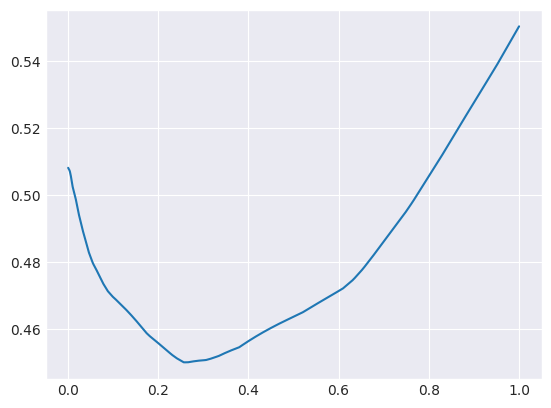

In [ ]:
plt.plot(df['mae'])

In [ ]:
dataset['exponential_0.001'] = dataset['average_temperature'].ewm(alpha=0.265,adjust=False).mean().shift(1)

In [ ]:
dataset['absolute error exp alpha 0.001'] = abs(dataset['average_temperature'] - dataset['exponential_0.001'])
dataset.head()

,average_temperature,MA_1,MA_10,MA_20,MA_50,absolute error MA1,absolute error MA10,absolute error MA20,absolute error MA50,exponential_0.1,absolute error exponentiele demping,exponential_0.001,absolute error exp alpha 0.001
year,,,,,,,,,,,,,
1800,14.183333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1801,14.000000,14.183333,NaN,NaN,NaN,0.183333,NaN,NaN,NaN,14.183333,0.183333,14.183333,0.183333
1802,14.066667,14.000000,NaN,NaN,NaN,0.066667,NaN,NaN,NaN,14.134750,0.068083,14.134750,0.068083
1803,13.850000,14.066667,NaN,NaN,NaN,0.216667,NaN,NaN,NaN,14.116708,0.266708,14.116708,0.266708
1804,14.591667,13.850000,NaN,NaN,NaN,0.741667,NaN,NaN,NaN,14.046030,0.545636,14.046030,0.545636


Visualiseer de geteste methodes samen met het verbruik in 1 grafiek

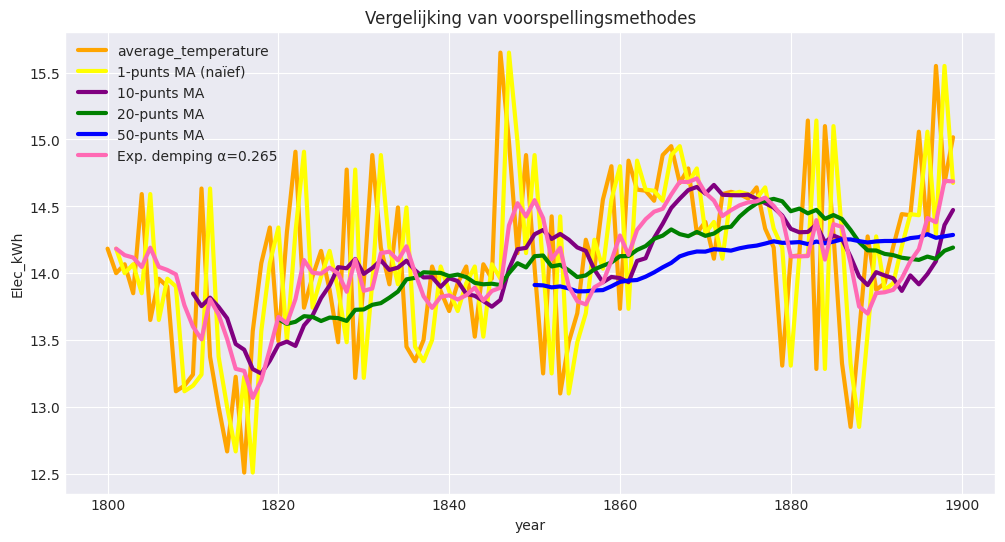

In [ ]:
# 1) Maak de beste expo‐demping
dataset['exp_best'] = (
    dataset['average_temperature']
    .ewm(alpha=best_alpha, adjust=False)
    .mean()
    .shift(1)
)

# 2) Plot alle series
plt.figure(figsize=(12,6))

dataset['average_temperature'].plot(color='orange', linewidth=3)
dataset['MA_1'].plot(color='yellow', linewidth=3)
dataset['MA_10'].plot(color='purple', linewidth=3)
dataset['MA_20'].plot(color='green', linewidth=3)
dataset['MA_50'].plot(color='blue', linewidth=3)
dataset['exp_best'].plot(color='hotpink', linewidth=3)

plt.legend([
    'average_temperature',
    '1-punts MA (naïef)',
    '10-punts MA',
    '20-punts MA',
    '50-punts MA',
    f'Exp. demping α={best_alpha:.3f}'
])
plt.title("Vergelijking van voorspellingsmethodes")
plt.xlabel(dataset.index.name)
plt.ylabel('Elec_kWh')
plt.show()


Visualiseer de gebruikte voorspellingstechnieken in een plot

Welke methode geniet jouw voorkeur om mee te voorspellen? Argumenteer waarom.